2025-03-21 17:00:42,316 - INFO - Loaded 71855 samples from /Users/ryok3n/Desktop/Workspace/VMP2D/src2/data/train_data_20.json
2025-03-21 17:00:43,065 - INFO - Loaded 15397 samples from /Users/ryok3n/Desktop/Workspace/VMP2D/src2/data/val_data_20.json


{'kp_gt_flat': array([-1.0477737e-01,  2.0705695e-01, -1.8520141e-01, -1.6090807e-01,
       -1.7141023e-01, -4.3683735e-01,  1.2299148e-02,  4.3023497e-01,
        1.9753583e-02,  7.6873019e-02,  2.5620246e-01, -2.8861246e-01,
        2.4694574e-01, -3.0167648e-01,  3.5757077e-01,  4.6989504e-01,
        1.8086687e-01, -6.6843338e-02,  2.6569358e-01, -2.7521306e-01,
        3.6048868e-01,  5.4865509e-01,  5.9636980e-01, -8.5956961e-02,
       -8.8270634e-02,  4.1916952e-02,  1.7091100e-01,  4.9590141e-01,
        4.5656213e-01,  3.1044573e-01,  5.1820469e-01,  1.5760973e-01,
       -1.6532697e-01,  1.1090200e-02, -4.0080696e-01, -4.3351792e-02,
       -2.2374944e-01, -8.3452642e-01, -2.1913062e-01, -9.7569555e-01,
       -7.9711072e-02,  3.1127304e-01, -3.8055456e-01, -3.5384050e-01,
       -2.2830743e-01, -6.9521803e-01, -5.3686451e-02,  3.8693792e-01,
       -2.8881320e-01, -2.9505017e-01, -2.2507964e-01,  9.2092548e-03,
       -1.1442908e-01,  4.3608019e-01, -1.8993458e-01,  1.6768

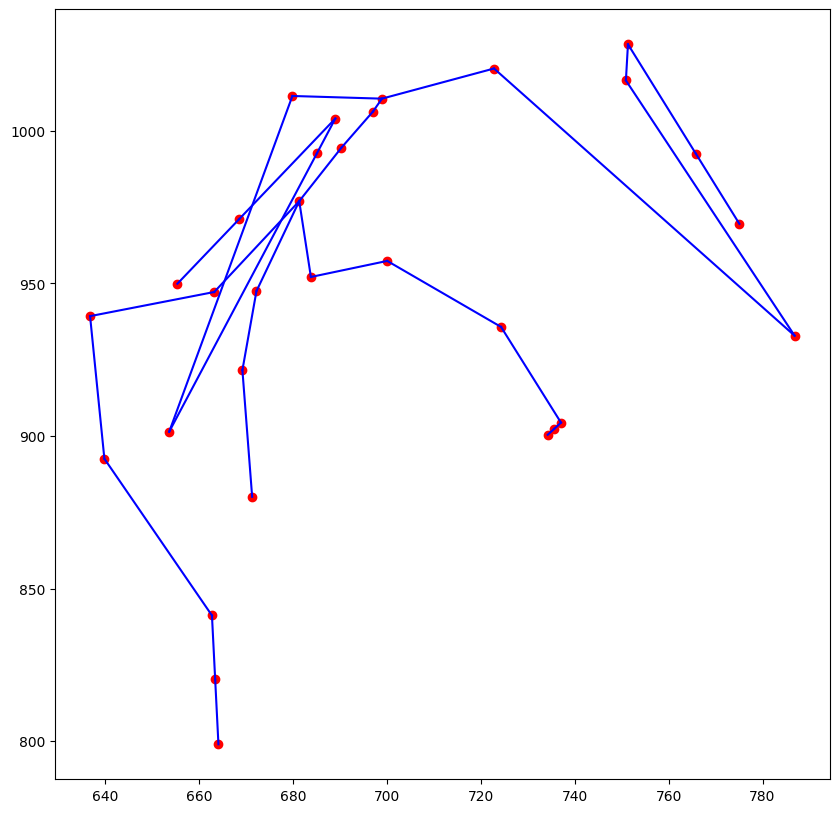

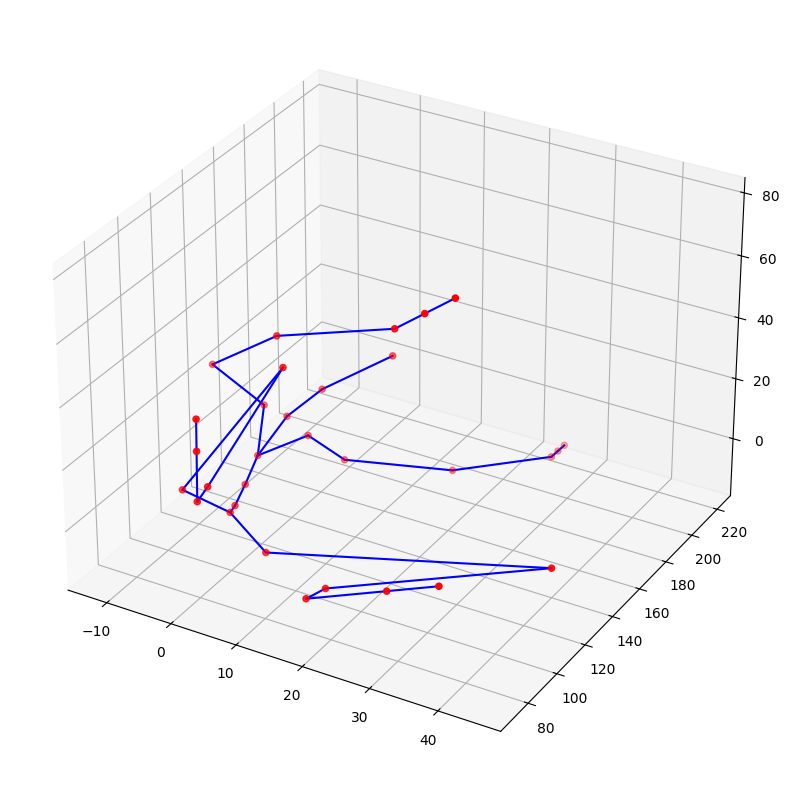

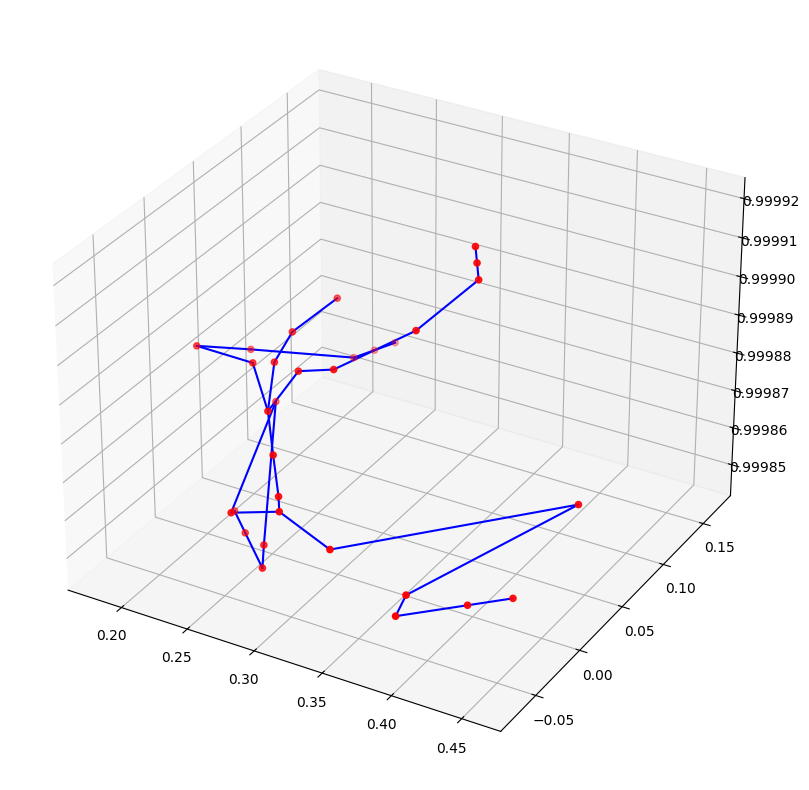

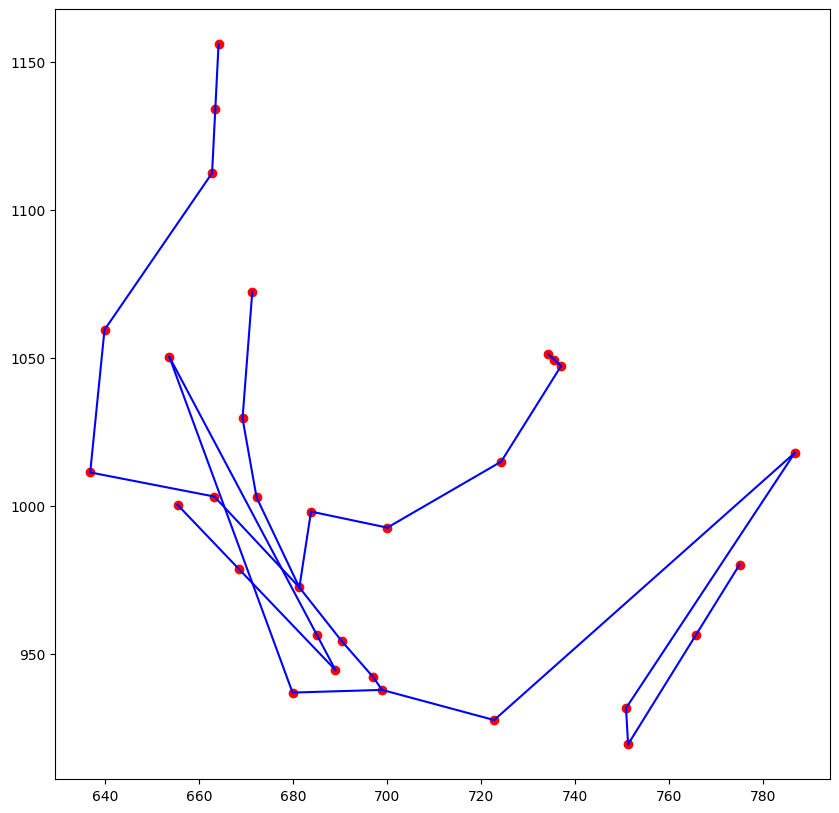

In [3]:
from dataloader import PoseDataLoader
import json 
from vis import plot_2d_keypoints , plot_3d_keypoints
import numpy as np 

with open('config.json', 'r') as f:
    config = json.load(f)

train_file = config['train_data']
val_file = config['val_data']

dataloader = PoseDataLoader(train_file, val_file)
print(dataloader.__getitem__(0))

print("==Testing a single batch==")
train_data = dataloader.prepare_data(batch_size=1, is_training=True)
for i in next(iter(train_data)):
    batch = i
    print(batch)


print("==Testing a single input reprojection ==")
data = dataloader.__getitem__(0)
kp2d = data['kp2d_camera']
kp3d_w = data['kp3d_world']
view_matrix = data['vm_norm_flat'].reshape(4,4)
projection_matrix = np.array([ 2.790552 ,  0.,         0.,         0.,         0.,         1.5696855,
  0.,         0.,         0.,         0.,        -1.0001999, -1.,
  0.,         0.,        -0.20002,    0.,       ], dtype=np.float32)
projection_matrix = projection_matrix.reshape((4,4))
fig = plot_2d_keypoints(kp2d,dataloader.joint_order)
fig_3d_w = plot_3d_keypoints(kp3d_w,dataloader.joint_order)
import tensorflow as tf

ones = tf.ones_like(kp3d_w[..., :1])
points_hom = tf.concat([kp3d_w, ones], axis=-1)
points_camera = np.matmul(points_hom,view_matrix)
points_clip = tf.matmul(points_camera, projection_matrix)
w = points_clip[..., 3:4]
points_ndc = points_clip[..., :3] / w
viewport_x, viewport_y, viewport_width, viewport_height = [0,0,1080,1980]
x_ndc = points_ndc[..., 0]
y_ndc = points_ndc[..., 1]
x_screen = (x_ndc * 0.5 + 0.5) * viewport_width + viewport_x
y_screen = (y_ndc * 0.5 + 0.5) * viewport_height + viewport_y

fig_3d_c = plot_3d_keypoints(points_ndc,dataloader.joint_order)
kp2d_reprojected = tf.stack([x_screen, y_screen], axis=-1)

fig_2d_reproj = plot_2d_keypoints(kp2d_reprojected,dataloader.joint_order)


2025-03-21 16:59:46,683 - INFO - Loaded 71855 samples from /Users/ryok3n/Desktop/Workspace/VMP2D/src2/data/train_data_20.json
2025-03-21 16:59:47,404 - INFO - Loaded 15397 samples from /Users/ryok3n/Desktop/Workspace/VMP2D/src2/data/val_data_20.json


tf.Tensor(
[[ 646.47106895 1107.49089472]
 [ 643.46845705 1196.08812603]
 [ 627.09689091 1251.17063793]
 [ 650.90301872 1024.64529632]
 [ 691.68945847 1173.17238611]
 [ 550.54048032 1050.97616859]
 [ 529.41556182 1040.46241468]
 [ 715.75878427  886.32903374]
 [ 634.63906756 1123.04353555]
 [ 571.07942697 1061.19891718]
 [ 721.97046751  862.91757998]
 [ 692.97508285 1000.7748049 ]
 [ 661.58015587 1157.9660462 ]
 [ 679.04021402 1025.88270875]
 [ 704.55592602  918.45819001]
 [ 693.13811096  954.87323919]
 [ 648.63016413 1158.85408158]
 [ 605.78983505 1138.03101786]
 [ 546.20458572 1050.54583691]
 [ 532.03457545 1032.33420456]
 [ 643.72770162  869.47041977]
 [ 574.53811206 1087.57229336]
 [ 559.97274018 1068.24202961]
 [ 650.69398963  847.26928617]
 [ 627.00737968  975.12835992]
 [ 633.90523571 1150.94689527]
 [ 629.54839215  993.3076856 ]
 [ 623.81730736  900.00440516]
 [ 606.26875501  934.43648484]
 [ 648.40222539 1036.52959635]
 [ 645.05090116 1069.38189052]], shape=(31, 2), dtype=float

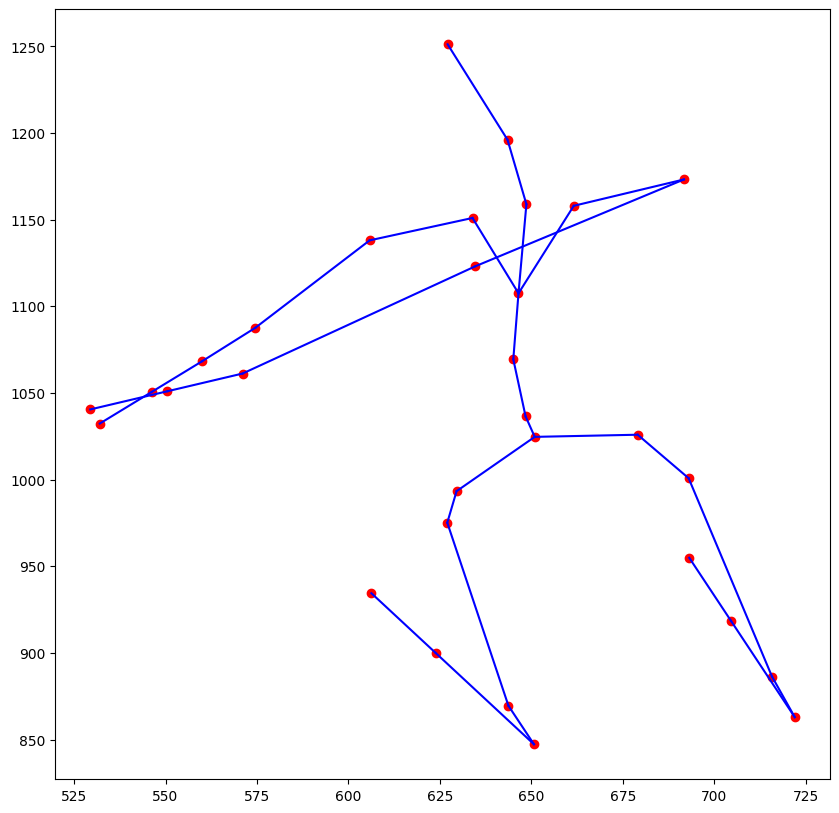

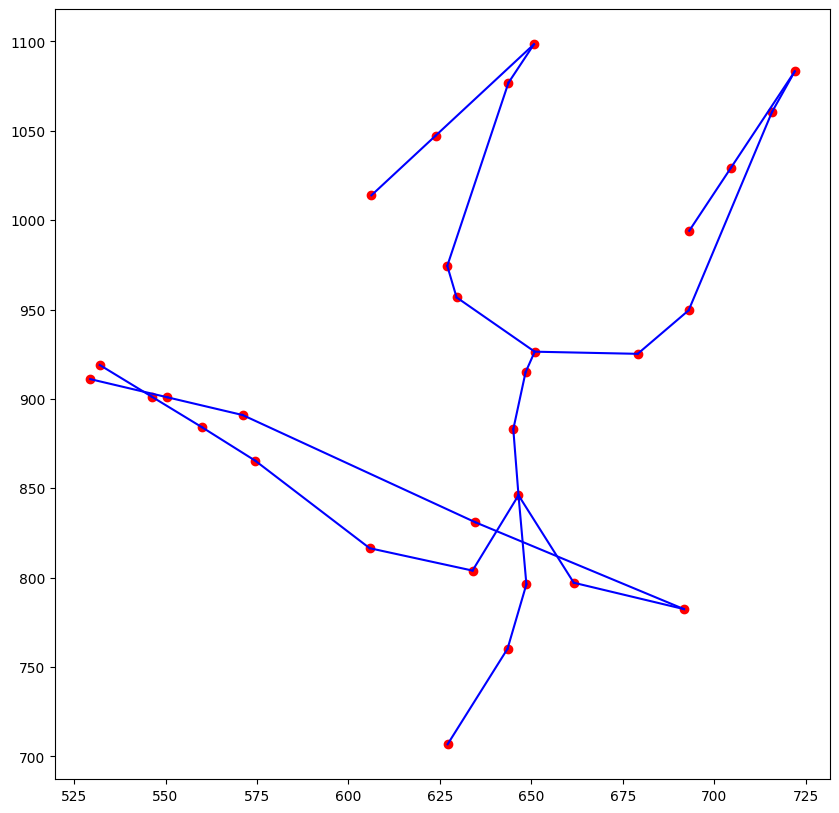

In [2]:
#dataloader.py
import numpy as np
import tensorflow as tf
import json 
from dataloader import PoseDataLoader

with open('config.json', 'r') as f:
    config = json.load(f)

train_file = config['train_data']
val_file = config['val_data']


dataloader = PoseDataLoader(train_file, val_file)
i = 1
data = dataloader.__getitem__(i)
kp2d = data['kp2d_camera']
kp3d_w = data['kp3d_world']
camera_matrix = data['vm']


projection_matrix = np.array([ 2.790552 , 0., 0., 0., 0., 1.5696855,
0., 0., 0., 0., -1.0001999, -1.,
0., 0., -0.20002, 0., ], dtype=np.float32)

projection_matrix = projection_matrix.reshape((4,4))

ones = tf.ones_like(kp3d_w[..., :1])
points_hom = tf.concat([kp3d_w, ones], axis=-1)
points_camera = np.matmul(points_hom,camera_matrix)
points_clip = tf.matmul(points_camera, projection_matrix)
w = points_clip[..., 3:4]
points_ndc = points_clip[..., :3] / w
viewport_x, viewport_y, viewport_width, viewport_height = [0,0,1080,1980]
x_ndc = points_ndc[..., 0]
y_ndc = points_ndc[..., 1]
x_screen = (x_ndc * 0.5 + 0.5) * viewport_width + viewport_x
y_screen = (y_ndc * 0.5 + 0.5) * viewport_height + viewport_y

# Stack the computed 2D coordinates.
projected_points = tf.stack([x_screen, y_screen], axis=-1)
print(projected_points)
fig = plot_2d_keypoints(projected_points,dataloader.joint_order)
print(kp2d)
fig2 = plot_2d_keypoints(kp2d,dataloader.joint_order)

error = np.linalg.norm(kp2d - projected_points)
print(error)

def compute_reprojection_loss(camera_matrix, points_3d, points_2d, projection, viewport):
    """
    Computes the reprojection loss between predicted 2D points (from 3D points)
    and the ground truth 2D points.

    Args:
    camera_matrix: Predicted camera matrices, shape (batch_size, 4, 4).
    points_3d: 3D points, shape (batch_size, num_points, 3).
    points_2d: Ground truth 2D points, shape (batch_size, num_points, 2).

    Returns:
    A scalar tensor representing the reprojection loss.
    """
    # Convert 3D points to homogeneous coordinates: [x, y, z, 1]
    ones = tf.ones_like(points_3d[..., :1])
    points_hom = tf.concat([points_3d, ones], axis=-1) # shape: (batch_size, num_points, 4)

    # Transform points by the predicted camera matrix.
    # Use the transpose since we assume points are row vectors.
    points_camera = tf.matmul(points_hom, camera_matrix)

    # Apply the constant projection matrix.
    points_clip = tf.matmul(points_camera, projection)

    # Perform perspective division (homogeneous normalization).
    w = points_clip[..., 3:4]
    points_ndc = points_clip[..., :3] / w # normalized device coordinates

    # Map normalized coordinates to viewport (screen) coordinates.
    viewport_x, viewport_y, viewport_width, viewport_height = viewport
    x_ndc = points_ndc[..., 0]
    y_ndc = points_ndc[..., 1]
    x_screen = (x_ndc * 0.5 + 0.5) * viewport_width + viewport_x
    y_screen = (y_ndc * 0.5 + 0.5) * viewport_height + viewport_y

    # Stack the computed 2D coordinates.
    projected_points = tf.stack([x_screen, y_screen], axis=-1)

    # Compute mean squared error between projected and ground truth 2D points.
    loss = tf.sqrt(tf.reduce_sum(tf.square(projected_points - points_2d)))
    return loss



